In [11]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filename = "../20240325-181039_fsgui_log.h5"
h5 = h5py.File(filename,'r')
h5keys = list(h5.keys())

In [4]:
process = {}
for i in range(len(h5keys)):
    dset = h5[h5keys[i]]
    fields = list(dset.keys())
    print('process',i,fields)
    if fields[0][:3] == 'rip':
        process['rip'] = i
    elif fields[0][:3] == 'OUT':
        process['OUT'] = i
    elif fields[0][:3] == 'spe':
        process['spe'] = i

process 0 ['rip_data', 'rip_detected', 'rip_envelope', 'rip_lfp_value', 'rip_mean', 'rip_sd', 'rip_timestamp']
process 1 ['OUTPUT_timestamp', 'OUTPUT_trigger']
process 2 ['speed', 'speed_timestamp']


### 1. Get FSGUI trigger time 

In [5]:
processID = process['OUT']
dset = h5[h5keys[processID]]
trigger_t = np.array(dset['OUTPUT_timestamp'])

In [6]:
trigger_t[0]

1711415439.8047094

In [7]:
## check that triggers sent in Python are all lockout time (120ms) apart
trigger_td = np.diff(trigger_t)
print(trigger_td[:10])
print('Counts of laser triggers within lockout 120ms: ',np.sum(trigger_td < 0.12))

[0.21553111 0.13772774 0.24810505 0.39604664 0.73659539 0.17943335
 0.19587445 0.12121868 0.21620727 0.36561704]
Counts of laser triggers within lockout 120ms:  0


Note that in addition to Python, the Statescript is the true workhorse of the final laser triggering.

One should check in the dio that laser triggers are indeed working correctly.

### 2. Get online filtered ripple data

In [8]:
processID = process['rip']
dset = h5[h5keys[processID]]
rip_t = np.array(dset['rip_timestamp'])
rip_A = np.array(dset['rip_envelope'])

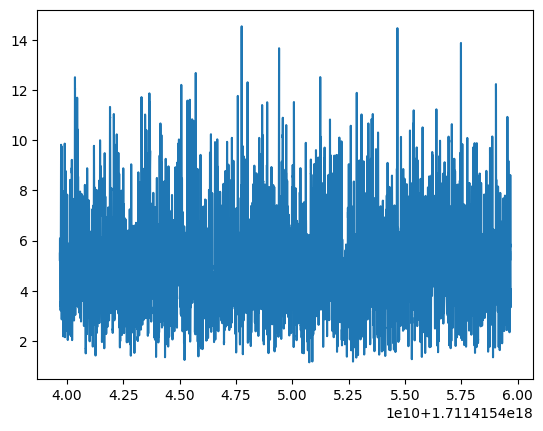

In [12]:
number_to_plot = 30000 #plot 20 seconds (1500Hz data)
plt.plot(rip_t[:number_to_plot],rip_A[:number_to_plot])
## can layer trigger time, mean + 2SD on top